<a href="https://colab.research.google.com/github/Donyicoder2006/Neural-Networks/blob/main/Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Import**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Student Performance and related factors Power BI Dataset.csv to Student Performance and related factors Power BI Dataset (1).csv
User uploaded file "Student Performance and related factors Power BI Dataset (1).csv" with length 11238431 bytes


In [2]:
import pandas as pd

# Assuming the uploaded file is the one you want to convert to a DataFrame
# You can get the filename from the 'uploaded' dictionary
filename = next(iter(uploaded))
Data = pd.read_csv(filename)

# Display the first few rows of the DataFrame
display(Data.head())

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [3]:
Data.columns

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')

In [4]:
data = Data.drop(['student_id'],axis = 1)

In [5]:
data.head(2)

,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99


**Detecting the Null Value**

In [6]:
(data.isnull().sum()/len(data))*100

,0
age,0.0
gender,0.0
major,0.0
study_hours_per_day,0.0
social_media_hours,0.0
netflix_hours,0.0
part_time_job,0.0
attendance_percentage,0.0
sleep_hours,0.0
diet_quality,0.0


In [7]:
numcol = data.select_dtypes(include = ['int64','float64']).columns
catcol = data.select_dtypes(include = ['object']).columns

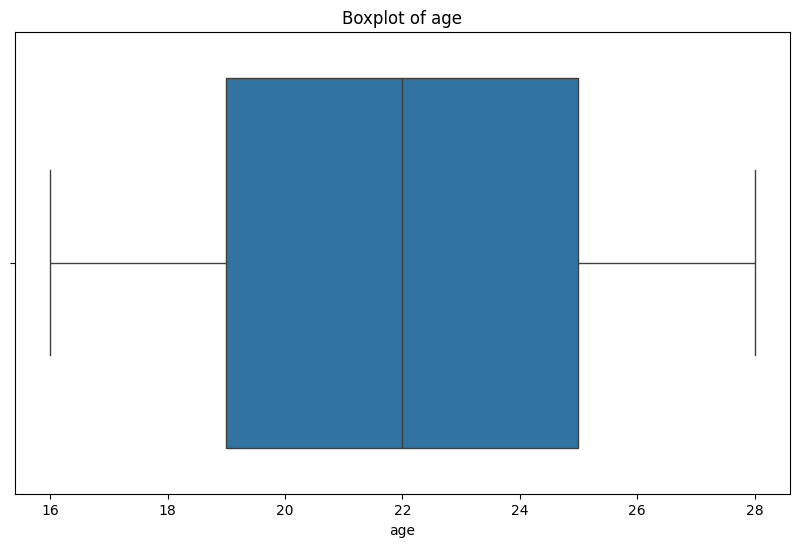

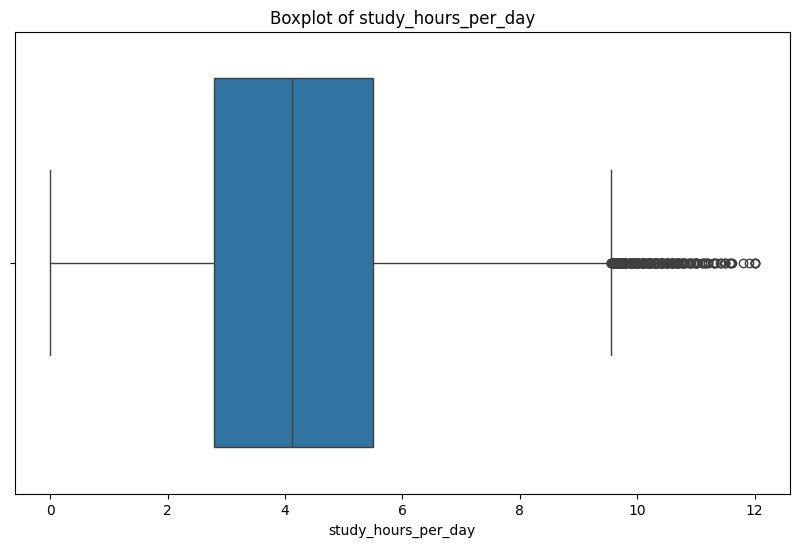

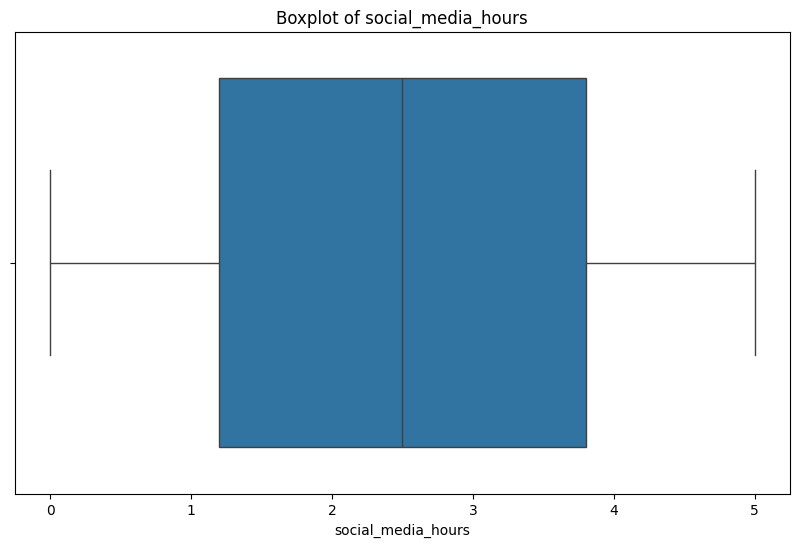

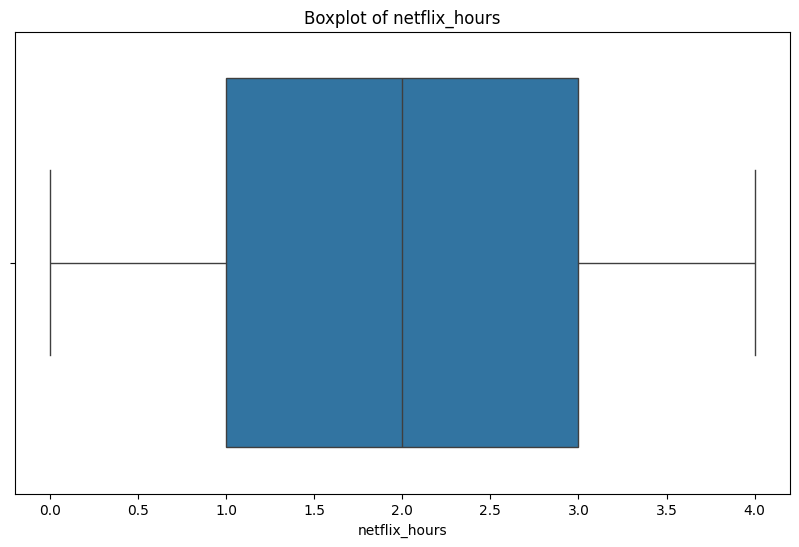

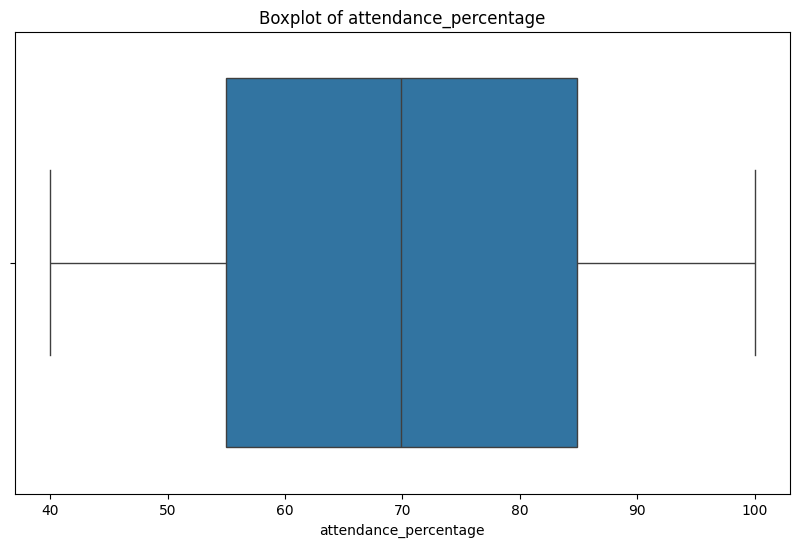

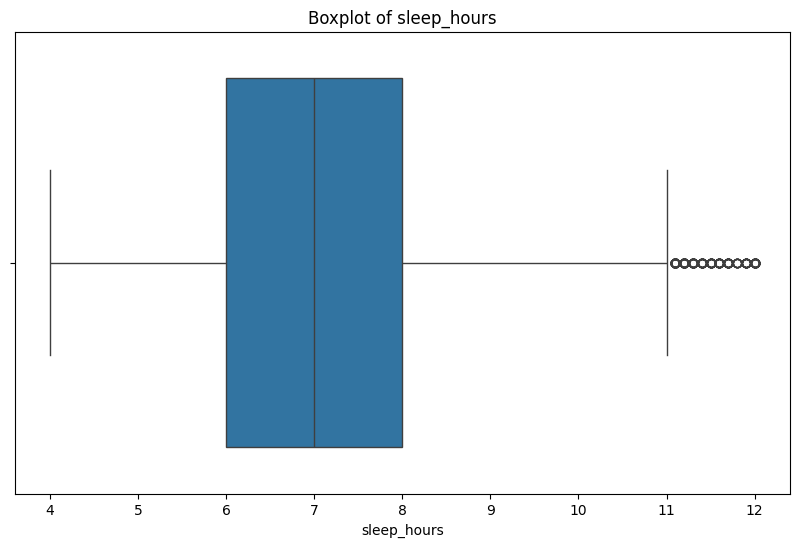

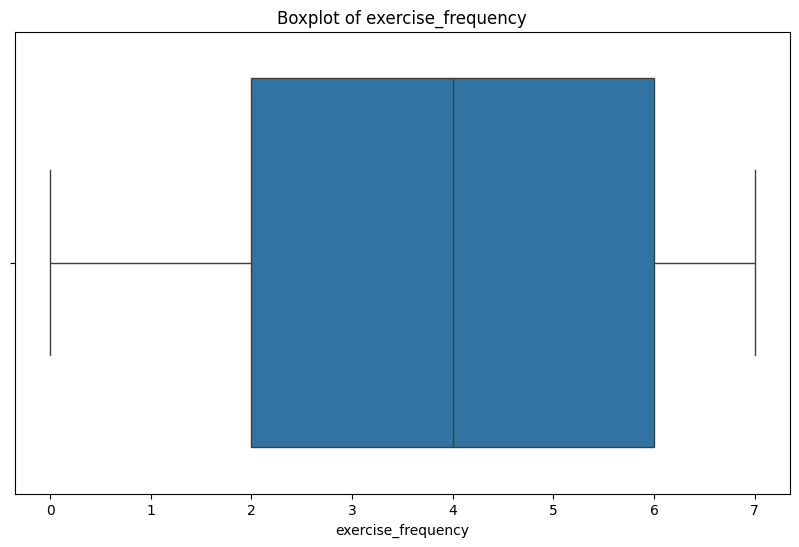

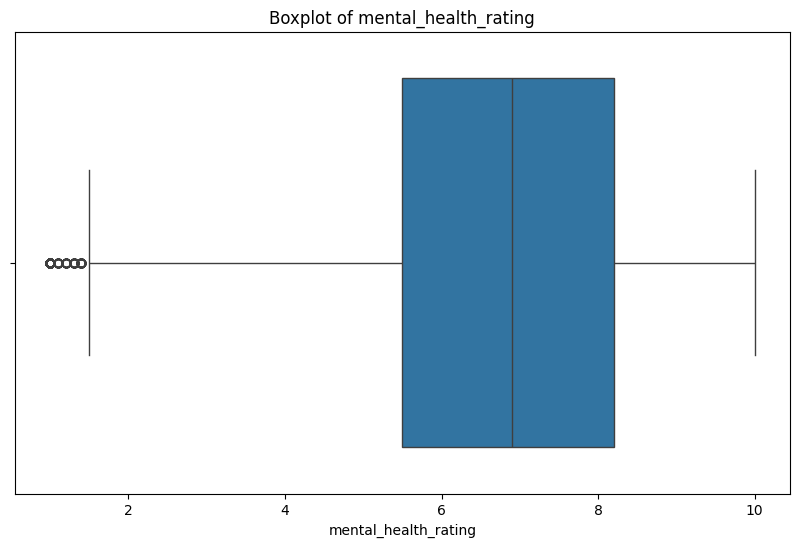

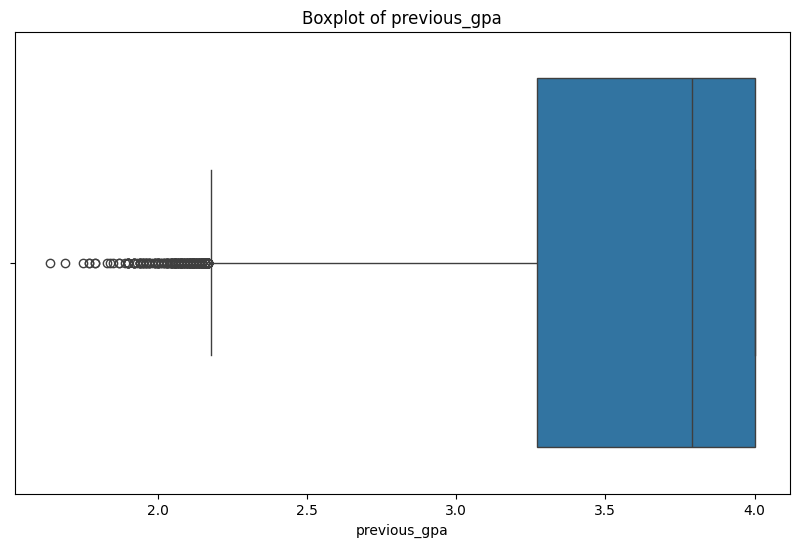

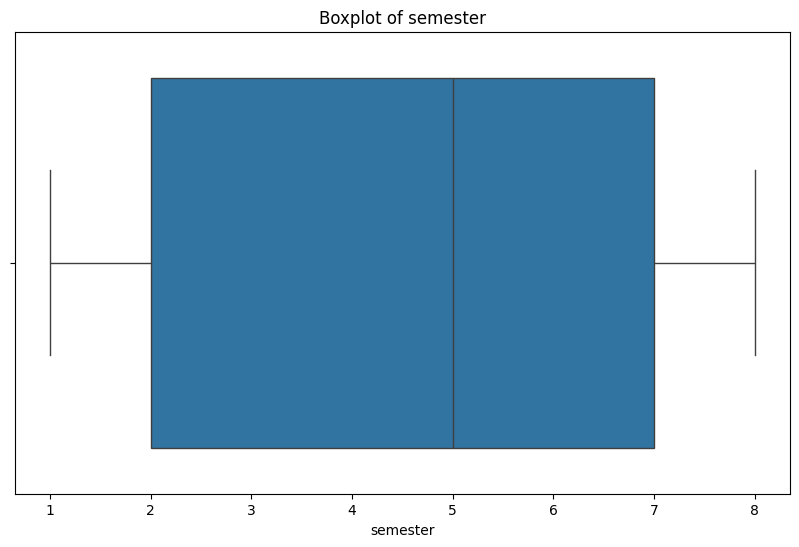

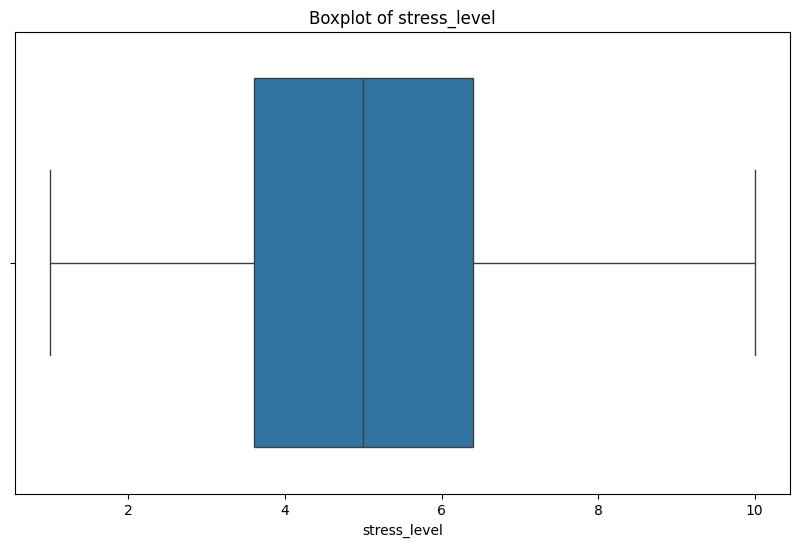

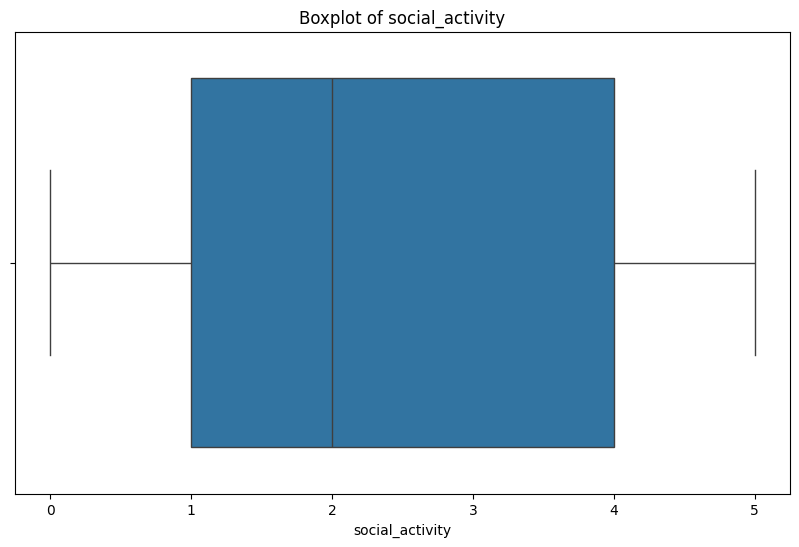

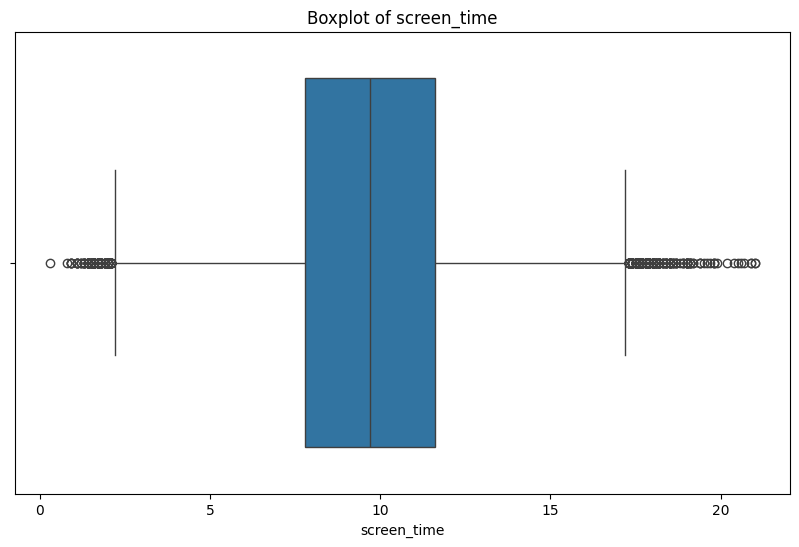

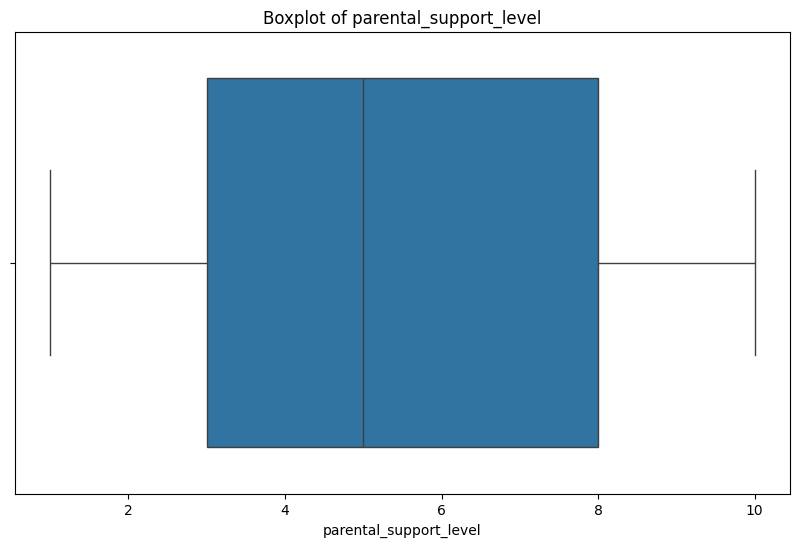

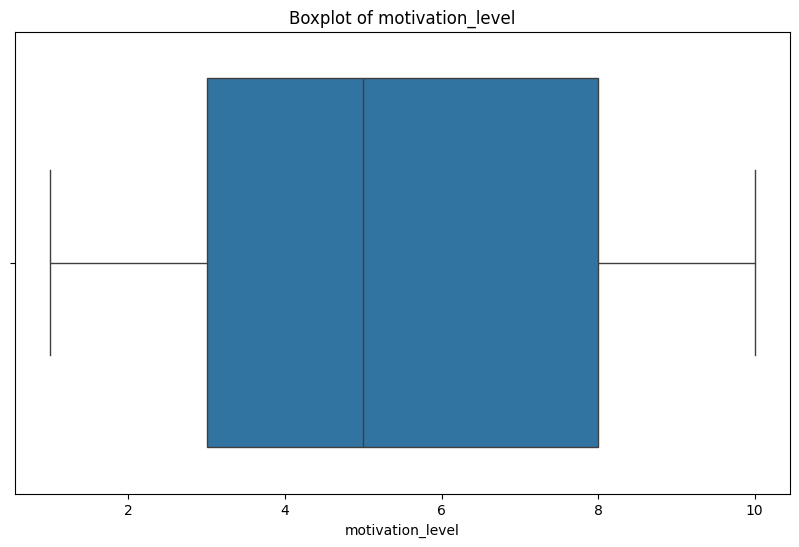

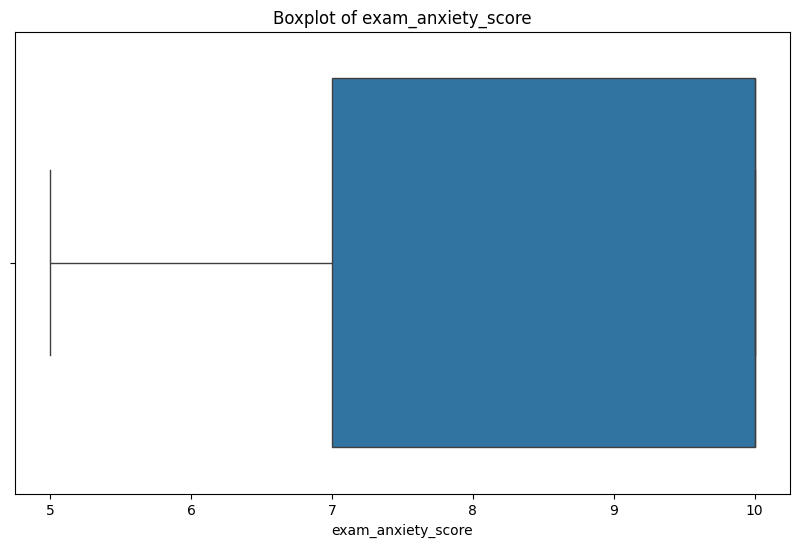

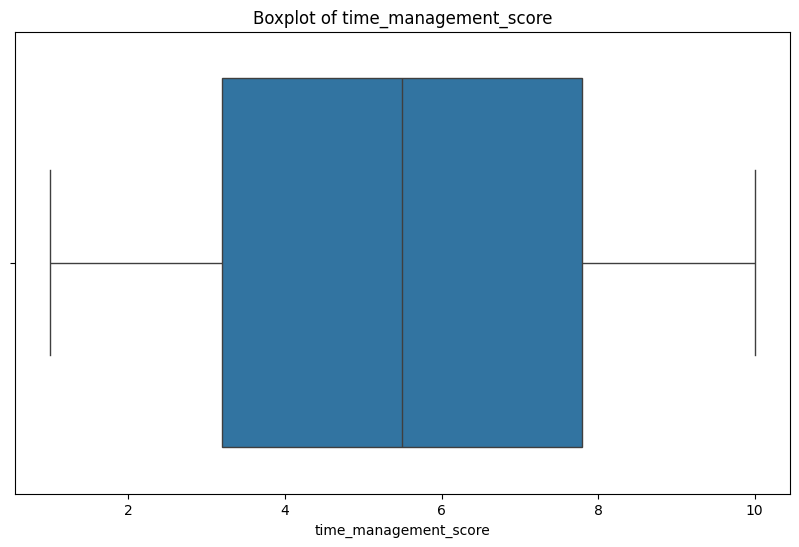

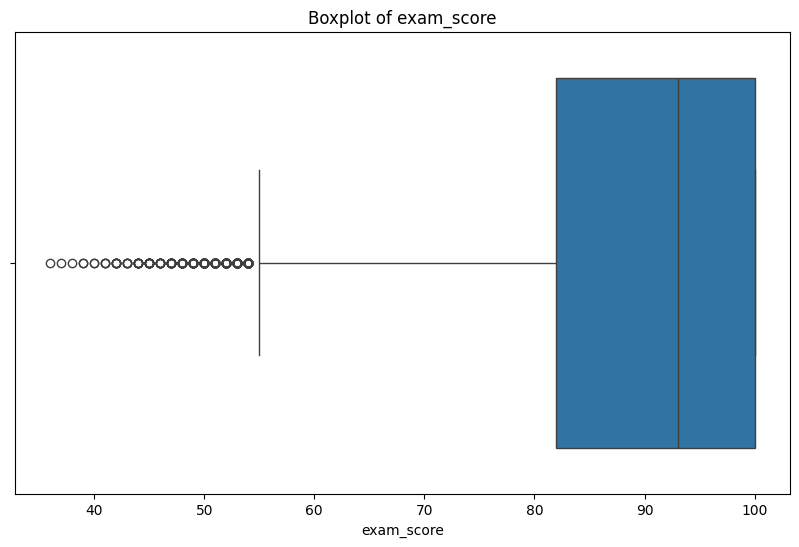

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numcol:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
data.columns

Index(['age', 'gender', 'major', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'previous_gpa', 'semester',
       'stress_level', 'dropout_risk', 'social_activity', 'screen_time',
       'study_environment', 'access_to_tutoring', 'family_income_range',
       'parental_support_level', 'motivation_level', 'exam_anxiety_score',
       'learning_style', 'time_management_score', 'exam_score'],
      dtype='object')

In [10]:
out_col = ['study_hours_per_day','sleep_hours','mental_health_rating','previous_gpa','screen_time','exam_score']

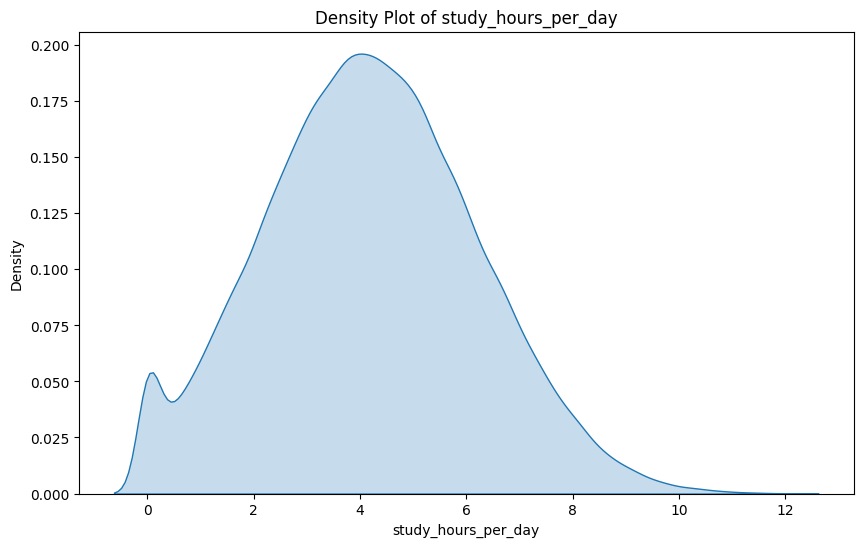

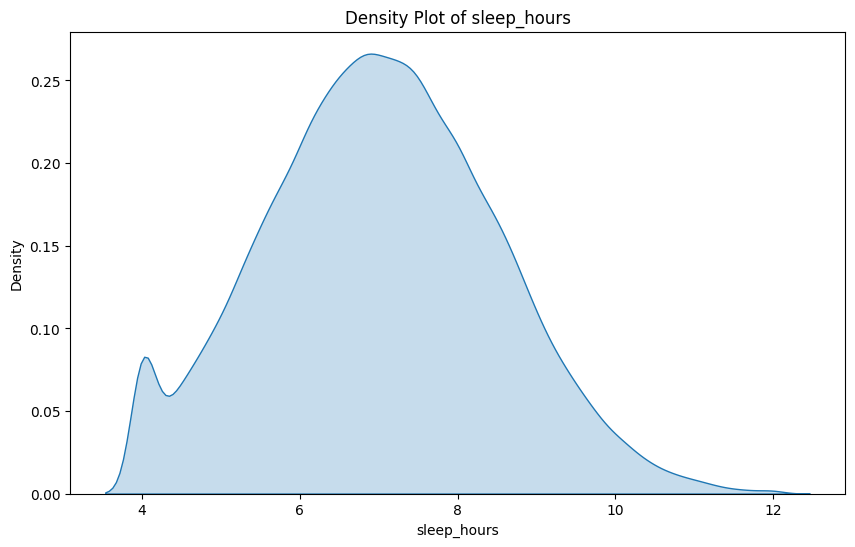

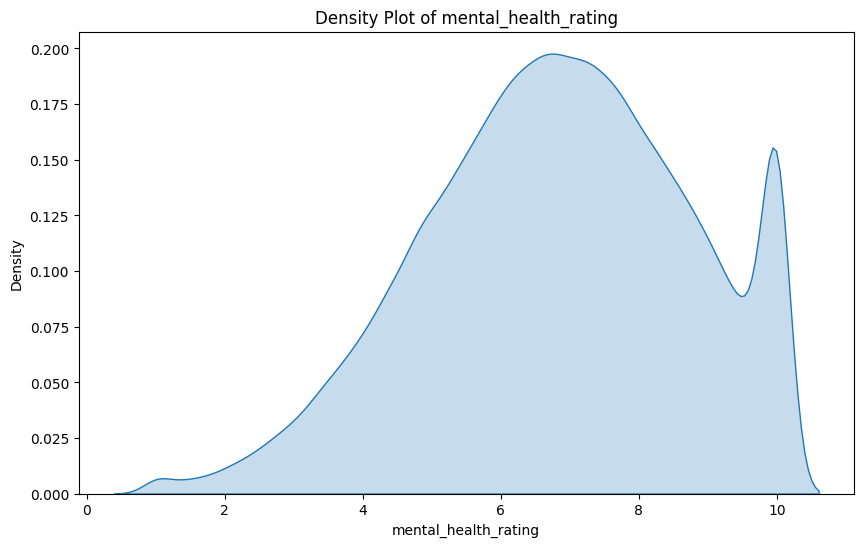

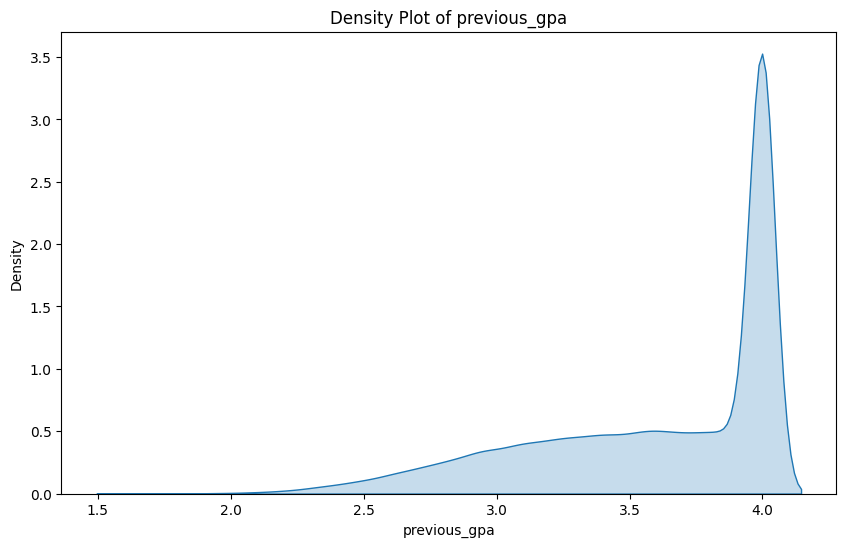

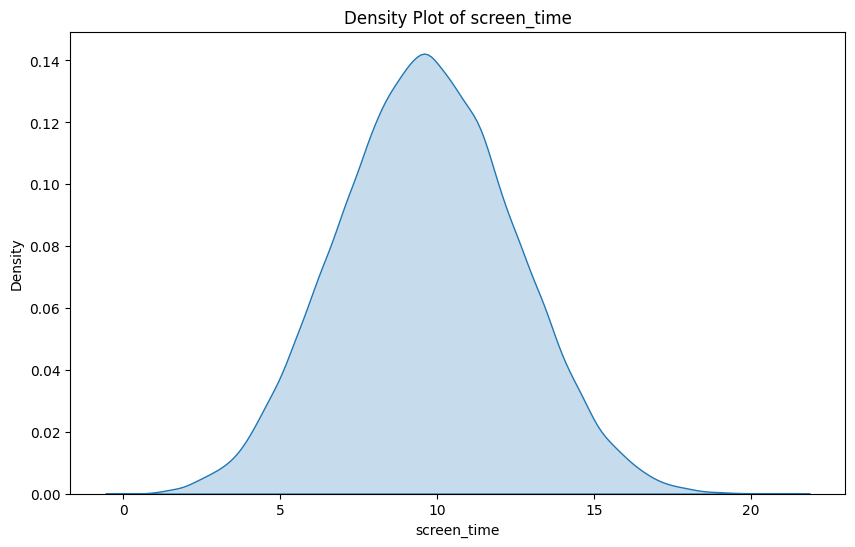

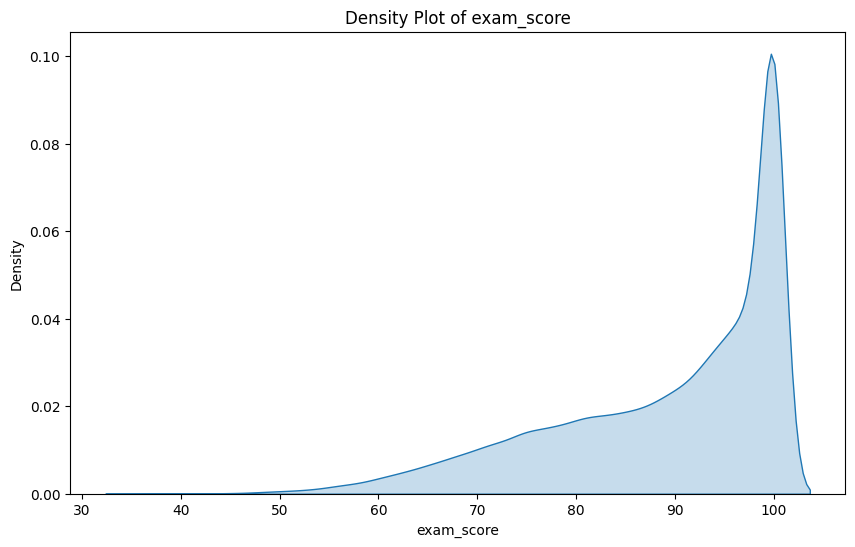

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in out_col:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data[col], fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [12]:
for col in out_col:
    skewness = data[col].skew()
    print(f'Skewness of {col}: {skewness}')

Skewness of study_hours_per_day: 0.13546347416697255
Skewness of sleep_hours: 0.11802921830477375
Skewness of mental_health_rating: -0.2722846247518401
Skewness of previous_gpa: -0.955622298309148
Skewness of screen_time: 0.055013002770107754
Skewness of exam_score: -1.0278435555855145


In [13]:
q1 = data['study_hours_per_day'].quantile(0.25)
q3 = data['study_hours_per_day'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
data = data[(data['study_hours_per_day'] >= lower_bound) & (data['study_hours_per_day'] <= upper_bound)]

In [14]:
q1 = data['sleep_hours'].quantile(0.25)
q3 = data['sleep_hours'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
data = data[(data['sleep_hours'] >= lower_bound) & (data['sleep_hours'] <= upper_bound)]

In [15]:
q1 = data['mental_health_rating'].quantile(0.25)
q3 = data['mental_health_rating'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
data = data[(data['mental_health_rating'] >= lower_bound) & (data['mental_health_rating'] <= upper_bound)]

In [16]:
q1 = data['previous_gpa'].quantile(0.25)
q3 = data['previous_gpa'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
data = data[(data['previous_gpa'] >= lower_bound) & (data['previous_gpa'] <= upper_bound)]

In [17]:
q1 = data['exam_score'].quantile(0.25)
q3 = data['exam_score'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
data = data[(data['exam_score'] >= lower_bound) & (data['exam_score'] <= upper_bound)]

In [18]:
from scipy import stats
data['Z_score'] = stats.zscore(data['screen_time'])
threshold = 3
data = data[(data['Z_score'].abs() <= threshold)]

In [19]:
data.columns

Index(['age', 'gender', 'major', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'previous_gpa', 'semester',
       'stress_level', 'dropout_risk', 'social_activity', 'screen_time',
       'study_environment', 'access_to_tutoring', 'family_income_range',
       'parental_support_level', 'motivation_level', 'exam_anxiety_score',
       'learning_style', 'time_management_score', 'exam_score', 'Z_score'],
      dtype='object')

In [20]:
x = data[['age', 'gender', 'major', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'previous_gpa', 'semester',
       'stress_level', 'dropout_risk', 'social_activity', 'screen_time',
       'study_environment', 'access_to_tutoring', 'family_income_range',
       'parental_support_level', 'motivation_level', 'exam_anxiety_score','time_management_score', 'exam_score']]
y = data['learning_style']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

**Feature Engineering**

In [22]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()

In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Identify categorical and numerical columns
cat_cols = x_train.select_dtypes(include=['object']).columns
num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

# Apply OrdinalEncoder to categorical columns
encode = OrdinalEncoder()
x_train[cat_cols] = encode.fit_transform(x_train[cat_cols])
x_test[cat_cols] = encode.transform(x_test[cat_cols])

# Encode the target variable
y_train_encode = encode.fit_transform(y_train.values.reshape(-1, 1))
y_test_encode = encode.transform(y_test.values.reshape(-1, 1))

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Model Training**

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [26]:
x_train.shape[1]

29

In [38]:
num_classes = len(y_train.unique())

model = Sequential()
model.add(Dense(29,activation = 'relu',input_dim = x_train.shape[1]))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(num_classes,activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = Adam(learning_rate = 0.001),metrics = ['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

call = EarlyStopping(monitor = 'val_loss',patience = 20,verbose = 1, min_delta = 0.000001, baseline = None, mode = 'auto')

In [41]:
history = model.fit(x_train,y_train_encode,epochs = 1000000,batch_size = 30,validation_data = (x_test,y_test_encode),callbacks = call)

Epoch 1/1000000
2092/2092 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2534 - loss: 1.3900 - val_accuracy: 0.2568 - val_loss: 1.3870
Epoch 2/1000000
2092/2092 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2613 - loss: 1.3860 - val_accuracy: 0.2564 - val_loss: 1.3865
Epoch 3/1000000
2092/2092 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2587 - loss: 1.3854 - val_accuracy: 0.2510 - val_loss: 1.3870
Epoch 4/1000000
2092/2092 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2654 - loss: 1.3839 - val_accuracy: 0.2556 - val_loss: 1.3867
Epoch 5/1000000
2092/2092 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2707 - loss: 1.3831 - val_accuracy: 0.2526 - val_loss: 1.3899
Epoch 6/1000000
2092/2092 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2759 - loss: 1.3808 - val_accuracy: 0.2511 - val_loss: 1.3911
Epoch 7/1000000
2092/2092 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2851 - loss: 1.3779 - val_accuracy: 0.2505 - val_loss: 1.3921
Epoch 8/1000000
2092/2092 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/s

In [44]:
y_pred = model.predict(x_test)

491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [45]:
y_pred = y_pred.argmax(axis = 1)

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_encode, y_pred)
print(f'Accuracy Score: {accuracy*100}%')

Accuracy Score: 25.344299923488904%


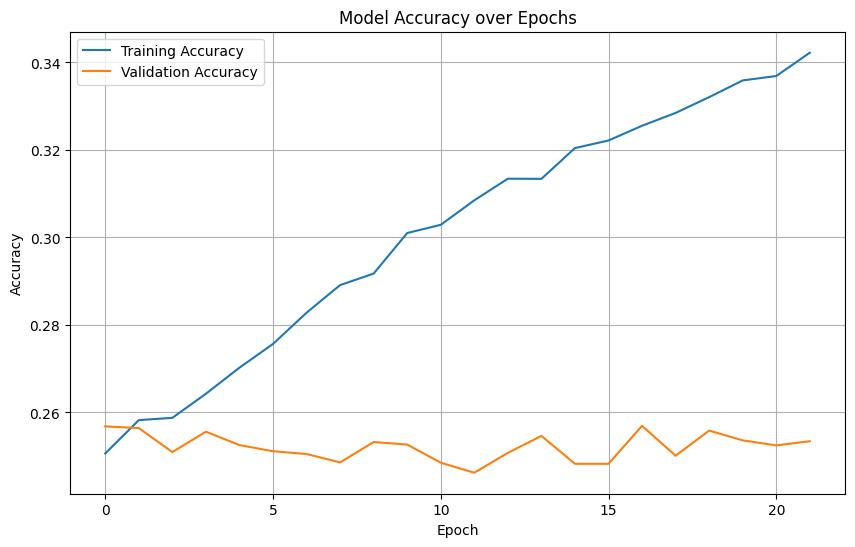

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()